# Nvidia Stock Prediction

#  Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')




In [ ]:
df = pd.read_csv("/content/NVidia_stock_history.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-01-22 00:00:00-05:00,0.040129,0.044786,0.035590,0.037621,2714688000,0.0,0.0
1,1999-01-25 00:00:00-05:00,0.040607,0.042039,0.037621,0.041562,510480000,0.0,0.0
2,1999-01-26 00:00:00-05:00,0.042039,0.042876,0.037740,0.038337,343200000,0.0,0.0
3,1999-01-27 00:00:00-05:00,0.038457,0.039412,0.036307,0.038218,244368000,0.0,0.0
4,1999-01-28 00:00:00-05:00,0.038218,0.038457,0.037859,0.038098,227520000,0.0,0.0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
6437,2024-08-22 00:00:00-04:00,130.020004,130.750000,123.099998,123.739998,376189100,0.0,0.0
6438,2024-08-23 00:00:00-04:00,125.860001,129.600006,125.220001,129.369995,323230300,0.0,0.0
6439,2024-08-26 00:00:00-04:00,129.570007,131.259995,124.370003,126.459999,331964700,0.0,0.0
6440,2024-08-27 00:00:00-04:00,125.050003,129.199997,123.879997,128.300003,301726100,0.0,0.0
6441,2024-08-28 00:00:00-04:00,128.119995,128.330002,122.639999,125.175003,241795982,0.0,0.0


# EDA

In [ ]:
# Convert 'Date' to datetime, handling timezone information if present
df['Date'] = pd.to_datetime(df['Date'], utc=True)

# Extract only the date and format it as YYYY-MM-DD
df['Date'] = df['Date'].dt.date

print(df)

            Date        Open        High         Low       Close      Volume  \
0     1999-01-22    0.040129    0.044786    0.035590    0.037621  2714688000   
1     1999-01-25    0.040607    0.042039    0.037621    0.041562   510480000   
2     1999-01-26    0.042039    0.042876    0.037740    0.038337   343200000   
3     1999-01-27    0.038457    0.039412    0.036307    0.038218   244368000   
4     1999-01-28    0.038218    0.038457    0.037859    0.038098   227520000   
...          ...         ...         ...         ...         ...         ...   
6437  2024-08-22  130.020004  130.750000  123.099998  123.739998   376189100   
6438  2024-08-23  125.860001  129.600006  125.220001  129.369995   323230300   
6439  2024-08-26  129.570007  131.259995  124.370003  126.459999   331964700   
6440  2024-08-27  125.050003  129.199997  123.879997  128.300003   301726100   
6441  2024-08-28  128.119995  128.330002  122.639999  125.175003   241795982   

      Dividends  Stock Splits  
0      

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.040129,0.044786,0.035590,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.040607,0.042039,0.037621,0.041562,510480000,0.0,0.0
2,1999-01-26,0.042039,0.042876,0.037740,0.038337,343200000,0.0,0.0
3,1999-01-27,0.038457,0.039412,0.036307,0.038218,244368000,0.0,0.0
4,1999-01-28,0.038218,0.038457,0.037859,0.038098,227520000,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6442 non-null   object 
 1   Open          6442 non-null   float64
 2   High          6442 non-null   float64
 3   Low           6442 non-null   float64
 4   Close         6442 non-null   float64
 5   Volume        6442 non-null   int64  
 6   Dividends     6442 non-null   float64
 7   Stock Splits  6442 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 402.8+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index("Date", inplace=True)

In [ ]:
start_date = '2023-07-01'
end_date = '2024-08-28'
df = df[(df.index >= start_date) & (df.index <= end_date)][['Close']]

In [ ]:
df= df[["Close"]]

In [ ]:
df.head()

,Close
Date,
2023-07-03,42.400303
2023-07-05,42.304337
2023-07-06,42.090401
2023-07-07,42.490276
2023-07-10,42.167374


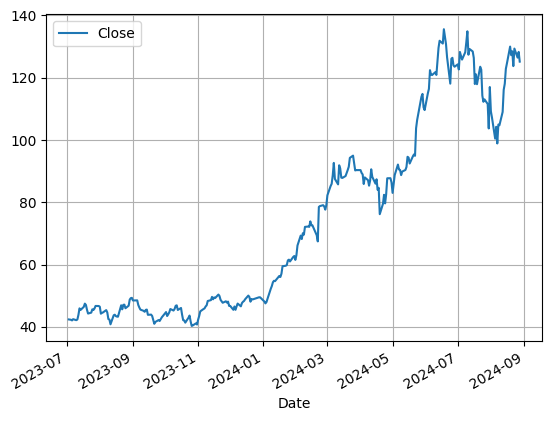

In [ ]:
df.plot()
plt.grid(True)

In [ ]:
# Test for stationarity
def test_stationarity(timeseries):
    # Determine rolling statistics
    rolmean = timeseries.rolling(100).mean()
    rolstd = timeseries.rolling(100).std()

    # Plot rolling statistics
    plt.figure(figsize=(18, 8))
    plt.grid(True)
    plt.plot(timeseries, color='blue', label='Original', linewidth=3)
    plt.plot(rolmean, color='red', label='Rolling mean', linewidth=3)
    plt.plot(rolstd, color='black', label='Rolling std', linewidth=3)
    plt.legend(loc='best', fontsize=20, shadow=True, facecolor='lightpink')
    plt.title('Rolling mean and std', fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show(block=False)

    print("Results of Dickey-Fuller Test:")
    adft = adfuller(timeseries, autolag="AIC")
    output = pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'Lags', 'Observations'])
    for key, value in adft[4].items():
        output[f'Critical Value ({key})'] = value
    print(output)


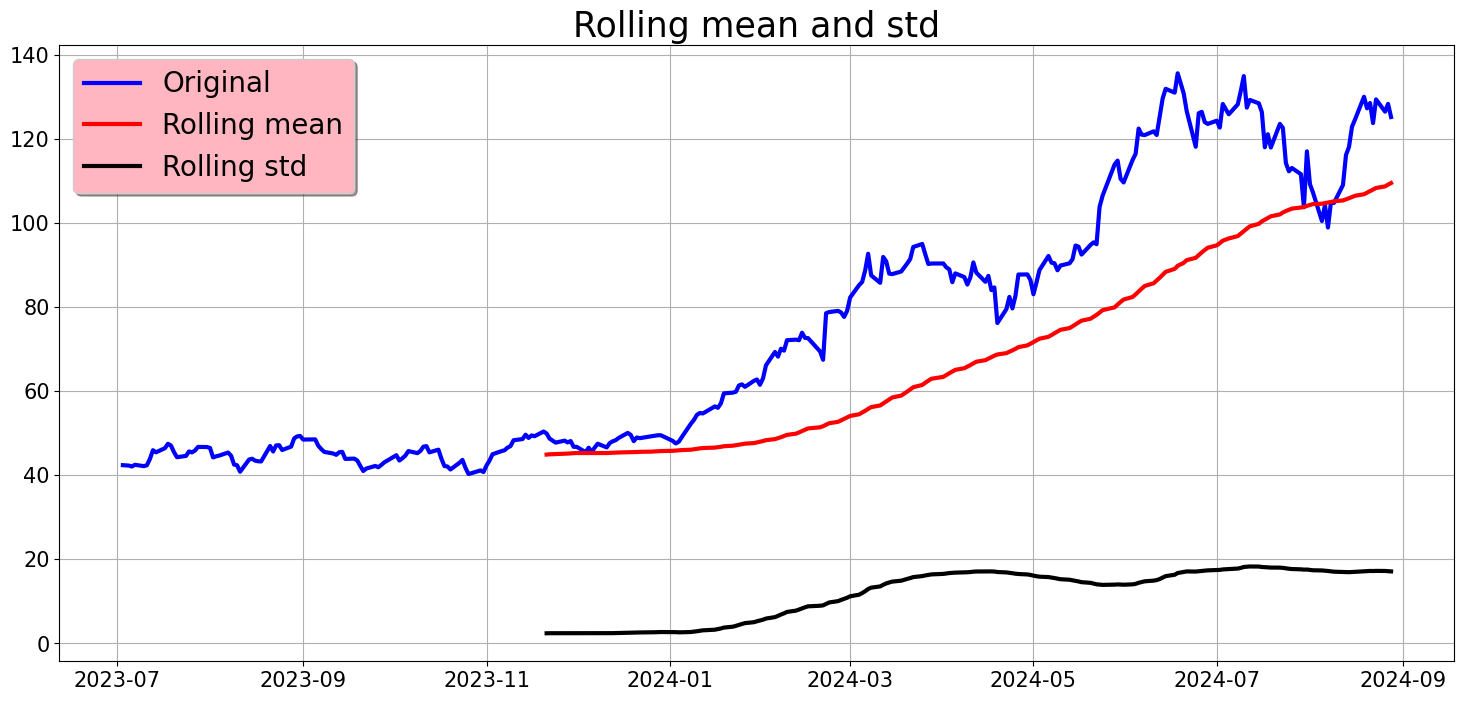

Results of Dickey-Fuller Test:
Test Statistics          -0.234493
p-value                   0.934283
Lags                     13.000000
Observations            278.000000
Critical Value (1%)      -3.454094
Critical Value (5%)      -2.871993
Critical Value (10%)     -2.572340
dtype: float64


In [ ]:
test_stationarity(df.Close)

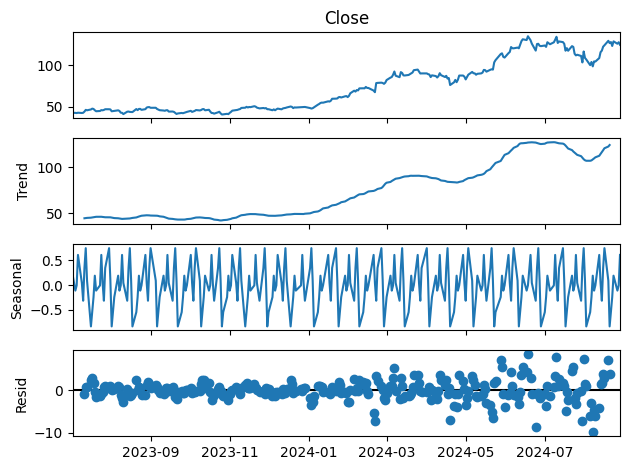

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'df' is your DataFrame and 'Close' is your time series column
result = seasonal_decompose(df['Close'], period=12)

# To plot the decomposition
import matplotlib.pyplot as plt

result.plot()
plt.show()


In [ ]:
result.seasonal

,seasonal
Date,
2023-07-03,0.192611
2023-07-05,-0.108729
2023-07-06,-0.003286
2023-07-07,0.612294
2023-07-10,0.046812
...,...
2024-08-22,-0.239728
2024-08-23,0.192611
2024-08-26,-0.108729


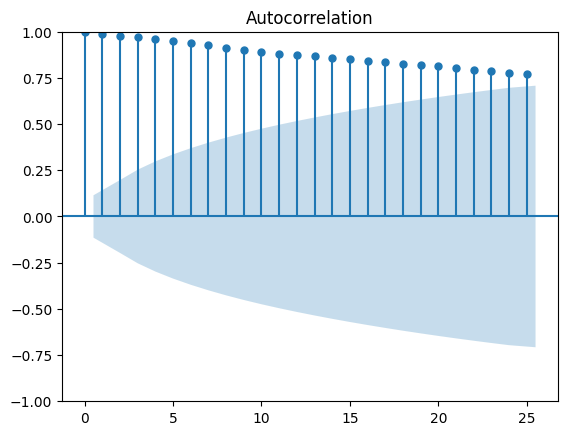

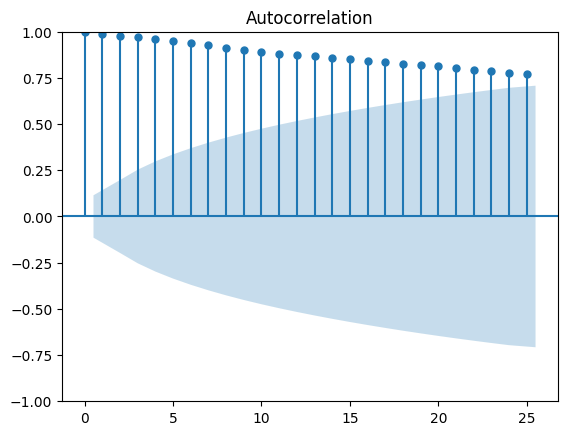

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df.Close)

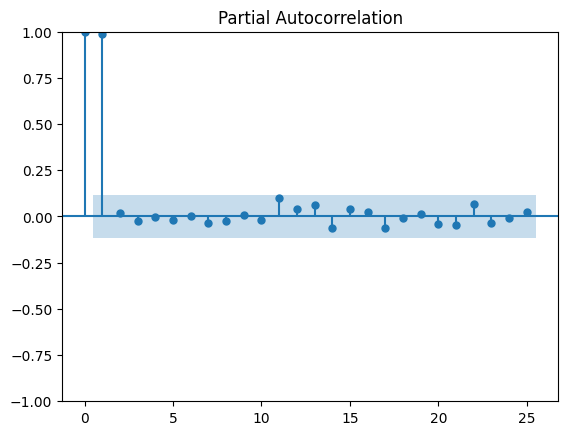

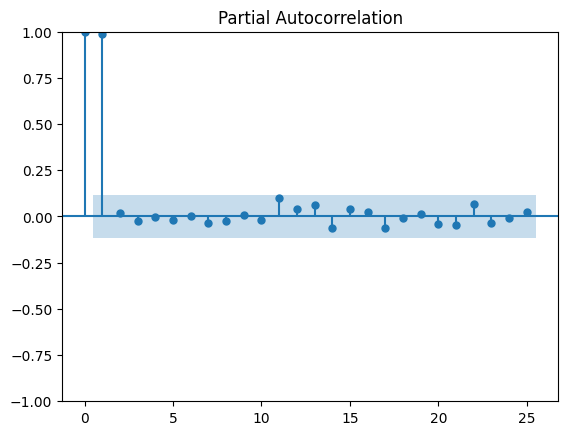

In [ ]:
plot_pacf(df.Close)

In [ ]:
df_stock = df['Close']


In [ ]:
df_close = df_stock.diff()

In [ ]:
df_close = df_close.dropna()

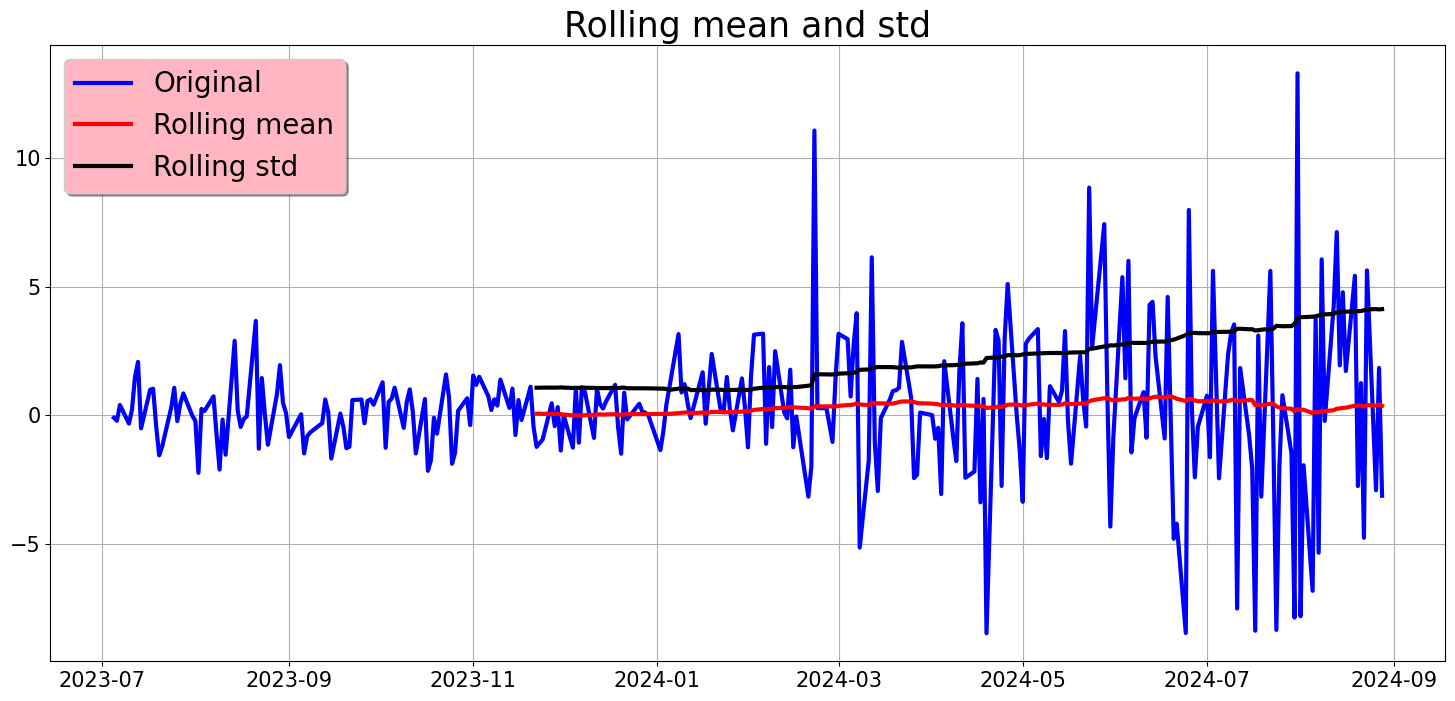

Results of Dickey-Fuller Test:
Test Statistics          -3.887555
p-value                   0.002128
Lags                     12.000000
Observations            278.000000
Critical Value (1%)      -3.454094
Critical Value (5%)      -2.871993
Critical Value (10%)     -2.572340
dtype: float64


In [ ]:
test_stationarity(df_close)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 2023-07-03 to 2024-08-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   292 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


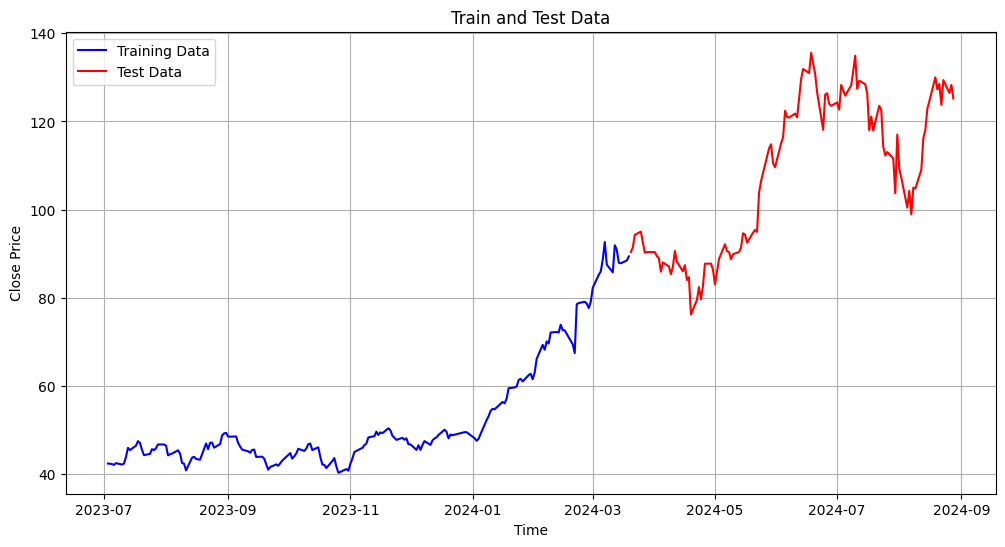

In [ ]:
# Create the train and test sets
train = df[['Close']][:180]
test = df[['Close']][180:]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data', color='blue')
plt.plot(test, label='Test Data', color='red')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Train and Test Data')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
print(len(train), len(test))


180 112


In [ ]:
# Function to find the best ARIMA order based on RMSE and print all tested orders with RMSE
def best_arima_order(train, test, p_values, d_values, q_values):
    best_order = None
    best_rmse = float('inf')
    results = []

    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(train, order=(p, d, q))
                    model_fit = model.fit()
                    forecast = model_fit.forecast(steps=len(test))
                    rmse = sqrt(mean_squared_error(test, forecast))
                    results.append(((p, d, q), rmse))
                    if rmse < best_rmse:
                        best_rmse = rmse
                        best_order = (p, d, q)
                except Exception as e:
                    continue

    print("\nARIMA Results:")
    for order, rmse in results:
        print(f"ARIMA{order} - RMSE: {rmse}")

    return best_order, best_rmse

In [ ]:
# Function to find the best SARIMA order based on RMSE and print all tested orders with RMSE
def best_sarima_order(train, test, p_values, d_values, q_values, P_values, D_values, Q_values, m_values):
    best_order = None
    best_rmse = float('inf')
    results = []

    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            for m in m_values:
                                try:
                                    model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, m))
                                    model_fit = model.fit(disp=False)
                                    forecast = model_fit.get_forecast(steps=len(test)).predicted_mean
                                    rmse = sqrt(mean_squared_error(test, forecast))
                                    results.append(((p, d, q, P, D, Q, m), rmse))
                                    if rmse < best_rmse:
                                        best_rmse = rmse
                                        best_order = (p, d, q, P, D, Q, m)
                                except Exception as e:
                                    continue

    print("\nSARIMA Results:")
    for order, rmse in results:
        print(f"SARIMA{order} - RMSE: {rmse}")

    return best_order, best_rmse



In [ ]:
# Define ranges for p, d, q for ARIMA and SARIMA
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

In [ ]:
# Seasonal parameters for SARIMA
P_values = range(0, 3)
D_values = range(0, 2)
Q_values = range(0, 3)
m_values = [12]  # Monthly seasonality

In [ ]:
# Get the best ARIMA order
best_arima_order, best_arima_rmse = best_arima_order(train, test, p_values, d_values, q_values)
print(f"\nBest ARIMA order: {best_arima_order} with RMSE: {best_arima_rmse}")


ARIMA Results:
ARIMA(0, 0, 0) - RMSE: 57.21347170487016
ARIMA(0, 0, 1) - RMSE: 57.05155186796579
ARIMA(0, 0, 2) - RMSE: 56.9467016557183
ARIMA(0, 1, 0) - RMSE: 24.916170300648794
ARIMA(0, 1, 1) - RMSE: 24.901744903921408
ARIMA(0, 1, 2) - RMSE: 25.011800431572453
ARIMA(0, 2, 0) - RMSE: 40.817735263918316
ARIMA(0, 2, 1) - RMSE: 18.175742093401674
ARIMA(0, 2, 2) - RMSE: 18.974943068719373
ARIMA(1, 0, 0) - RMSE: 28.685719600104136
ARIMA(1, 0, 1) - RMSE: 28.876541392553815
ARIMA(1, 0, 2) - RMSE: 27.987402667116946
ARIMA(1, 1, 0) - RMSE: 24.90560376810481
ARIMA(1, 1, 1) - RMSE: 24.8943260373816
ARIMA(1, 1, 2) - RMSE: 25.002800660840936
ARIMA(1, 2, 0) - RMSE: 34.84993029092486
ARIMA(1, 2, 1) - RMSE: 18.638303444819275
ARIMA(1, 2, 2) - RMSE: 17.432691044162542
ARIMA(2, 0, 0) - RMSE: 28.82302647856336
ARIMA(2, 0, 1) - RMSE: 29.144537588459574
ARIMA(2, 0, 2) - RMSE: 28.136349163798105
ARIMA(2, 1, 0) - RMSE: 25.048386114901447
ARIMA(2, 1, 1) - RMSE: 24.986552856510162
ARIMA(2, 1, 2) - RMSE: 24.9

# Arima Model

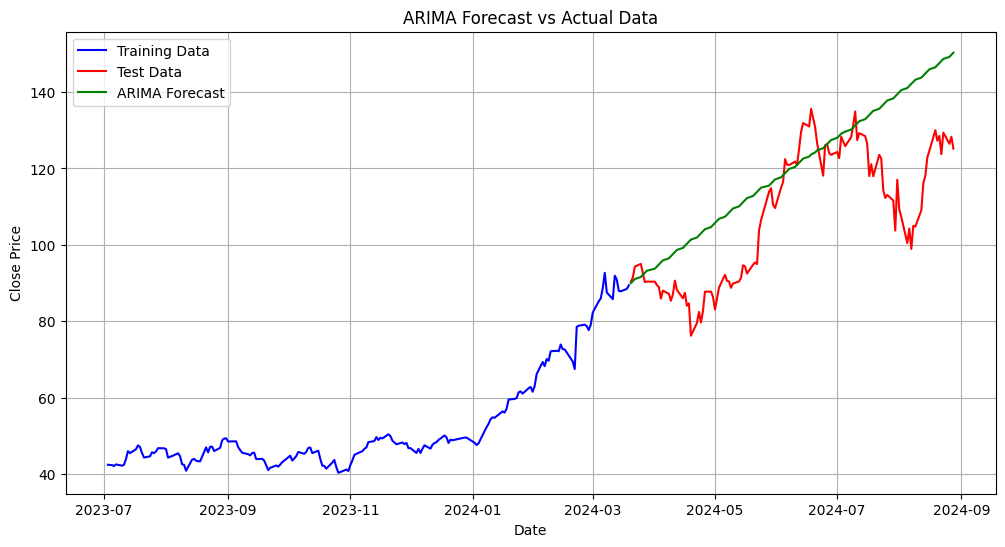

In [ ]:
arima_order = (1,2,2)  # ARIMA(p, d, q) order

# Fit ARIMA model
arima_model = ARIMA(train, order=arima_order)
arima_fit = arima_model.fit()

# Forecast the next 30 days
forecast_steps = len(test)  # Number of steps to forecast (length of test data)
arima_forecast = arima_fit.forecast(steps=forecast_steps)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='red')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Forecast vs Actual Data')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Get the best SARIMA order
best_sarima_order, best_sarima_rmse = best_sarima_order(train,test, p_values, d_values, q_values, P_values, D_values, Q_values, m_values)
print(f"\nBest SARIMA order: {best_sarima_order} with RMSE: {best_sarima_rmse}")


SARIMA Results:
SARIMA(0, 0, 0, 0, 0, 0, 12) - RMSE: 108.81487528366232
SARIMA(0, 0, 0, 0, 0, 1, 12) - RMSE: 105.7571892248752
SARIMA(0, 0, 0, 0, 0, 2, 12) - RMSE: 103.05880396380739
SARIMA(0, 0, 0, 0, 1, 0, 12) - RMSE: 25.620436497467928
SARIMA(0, 0, 0, 0, 1, 1, 12) - RMSE: 24.019269437509625
SARIMA(0, 0, 0, 0, 1, 2, 12) - RMSE: 21.047934519835746
SARIMA(0, 0, 0, 1, 0, 0, 12) - RMSE: 27.573412751558763
SARIMA(0, 0, 0, 1, 0, 1, 12) - RMSE: 26.51085543464093
SARIMA(0, 0, 0, 1, 0, 2, 12) - RMSE: 24.09280605086742
SARIMA(0, 0, 0, 1, 1, 0, 12) - RMSE: 19.739313380419397
SARIMA(0, 0, 0, 1, 1, 1, 12) - RMSE: 18.838817821669956
SARIMA(0, 0, 0, 1, 1, 2, 12) - RMSE: 25.58211500518195
SARIMA(0, 0, 0, 2, 0, 0, 12) - RMSE: 23.697543385469366
SARIMA(0, 0, 0, 2, 0, 1, 12) - RMSE: 27.624162917882092
SARIMA(0, 0, 0, 2, 0, 2, 12) - RMSE: 16.137079563830515
SARIMA(0, 0, 0, 2, 1, 0, 12) - RMSE: 22.640163822570702
SARIMA(0, 0, 0, 2, 1, 1, 12) - RMSE: 23.0601464473535
SARIMA(0, 0, 0, 2, 1, 2, 12) - RMSE: 

# Sarima Model

In [ ]:
# 2. Forecast with best SARIMA model
sarima_model = SARIMAX(train, order=best_sarima_order[:3], seasonal_order=best_sarima_order[3:])
sarima_fit = sarima_model.fit(disp=False)



In [ ]:
# Forecast the next days
forecast_steps = len(test)  # Number of steps to forecast (length of test data)
sarima_forecast = sarima_fit.forecast(steps=forecast_steps)


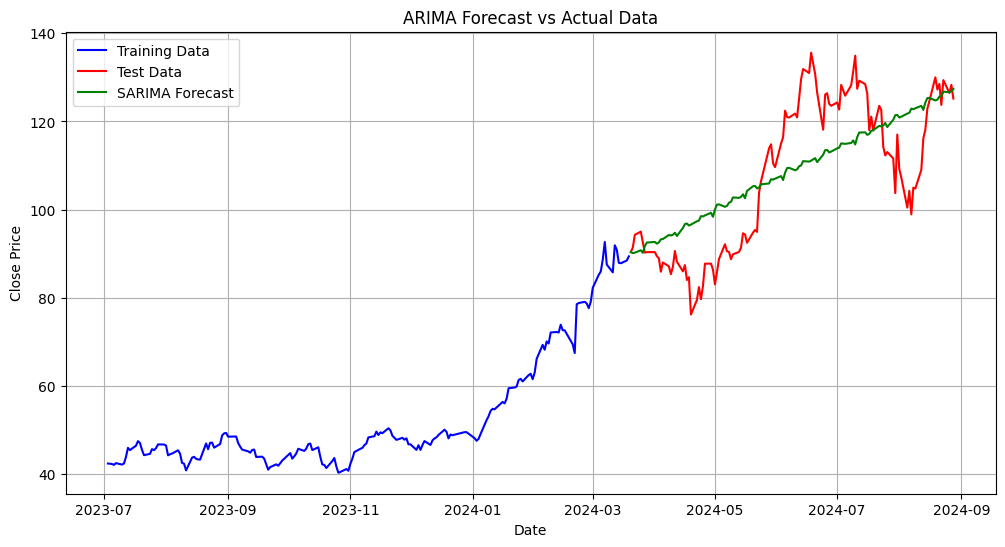

In [ ]:
# Plotting
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='red')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Forecast vs Actual Data')
plt.grid(True)
plt.legend()
plt.show()

# Next 30 Days Forecasting

In [ ]:
# Define the future dates for 30 days after the test period
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=30, freq='D')


In [ ]:
# Forecast with ARIMA
arima_forecast = arima_fit.get_forecast(steps=30)
arima_forecast_mean = arima_forecast.predicted_mean
arima_conf_int = arima_forecast.conf_int()

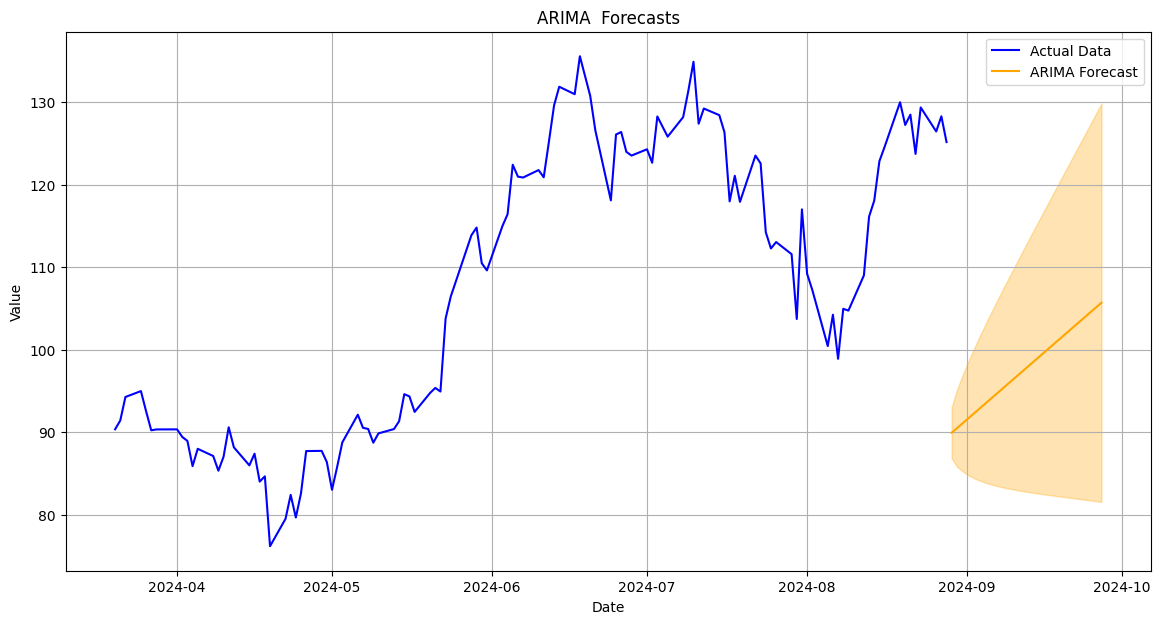

In [ ]:
plt.figure(figsize=(14, 7))

# Plot Actual data
plt.plot(test, label='Actual Data', color='blue')

# Plot ARIMA forecast
plt.plot(future_dates, arima_forecast_mean, label='ARIMA Forecast', color='orange')
plt.fill_between(future_dates, arima_conf_int.iloc[:, 0], arima_conf_int.iloc[:, 1], color='orange', alpha=0.3)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA  Forecasts')
plt.grid(True)

plt.legend()
plt.show()


In [ ]:
# Forecast with SARIMA
sarima_forecast = sarima_fit.get_forecast(steps=30)
sarima_forecast_mean = sarima_forecast.predicted_mean
sarima_conf_int = sarima_forecast.conf_int()

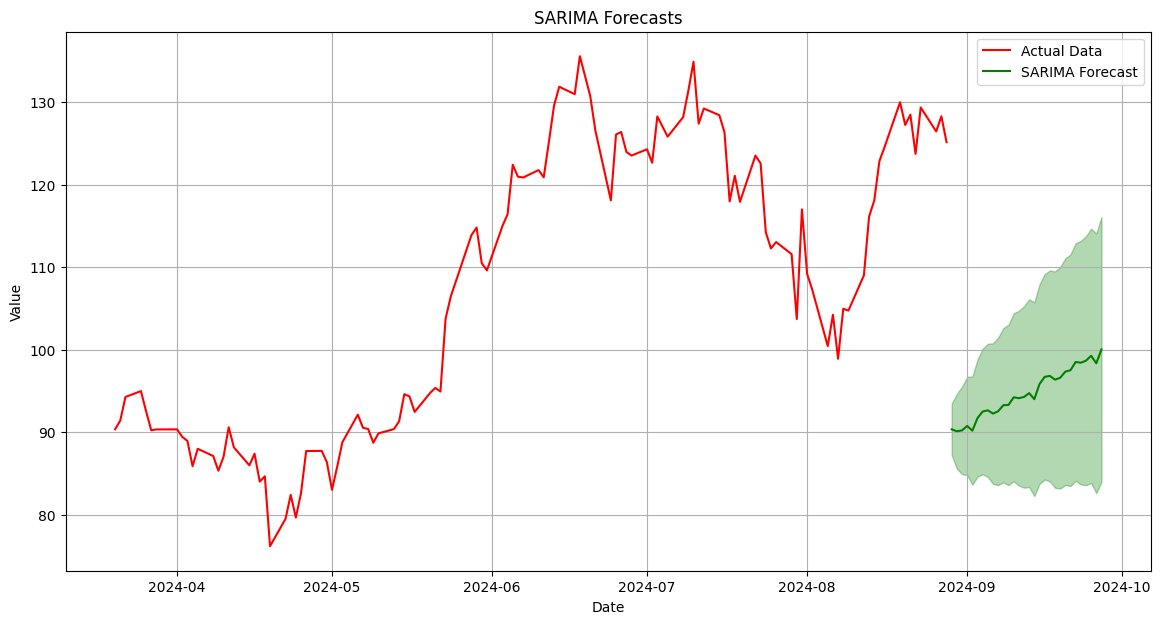

In [ ]:
plt.figure(figsize=(14, 7))

# Plot Actual data
plt.plot(test, label='Actual Data', color='red')

# Plot SARIMA forecast
plt.plot(future_dates, sarima_forecast_mean, label='SARIMA Forecast', color='green')
plt.fill_between(future_dates, sarima_conf_int.iloc[:, 0], sarima_conf_int.iloc[:, 1], color='green', alpha=0.3)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMA Forecasts')
plt.grid(True)
plt.legend()
plt.show()


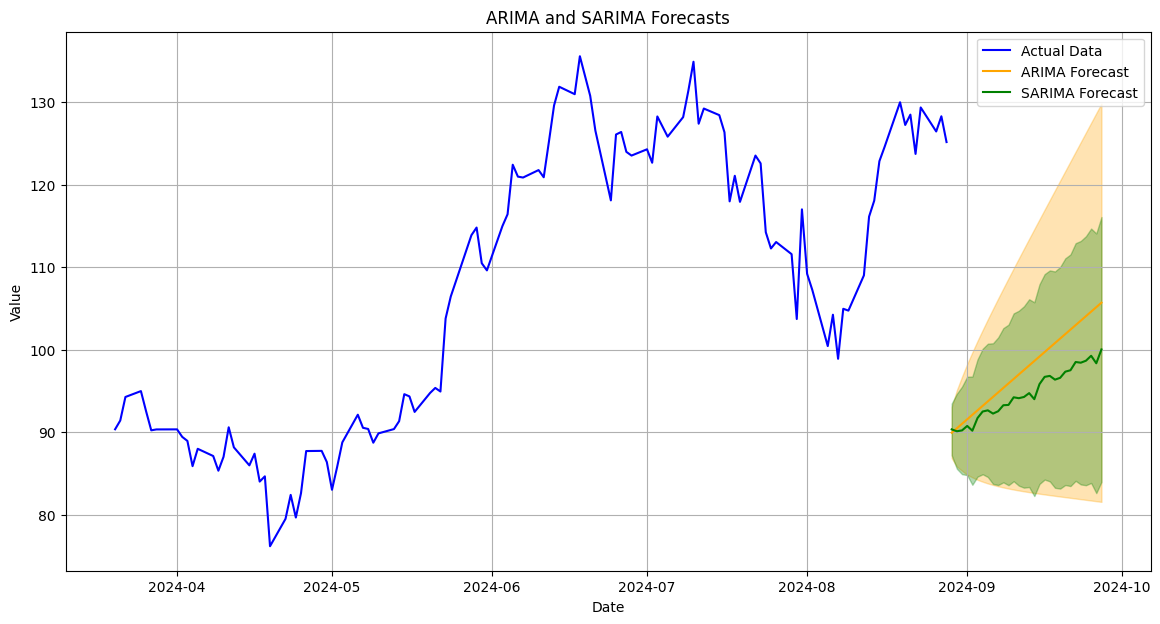

In [ ]:
plt.figure(figsize=(14, 7))

# Plot Actual data
plt.plot(test, label='Actual Data', color='blue')

# Plot ARIMA forecast
plt.plot(future_dates, arima_forecast_mean, label='ARIMA Forecast', color='orange')
plt.fill_between(future_dates, arima_conf_int.iloc[:, 0], arima_conf_int.iloc[:, 1], color='orange', alpha=0.3)

# Plot SARIMA forecast
plt.plot(future_dates, sarima_forecast_mean, label='SARIMA Forecast', color='green')
plt.fill_between(future_dates, sarima_conf_int.iloc[:, 0], sarima_conf_int.iloc[:, 1], color='green', alpha=0.3)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA and SARIMA Forecasts')
plt.grid(True)
plt.legend()
plt.show()


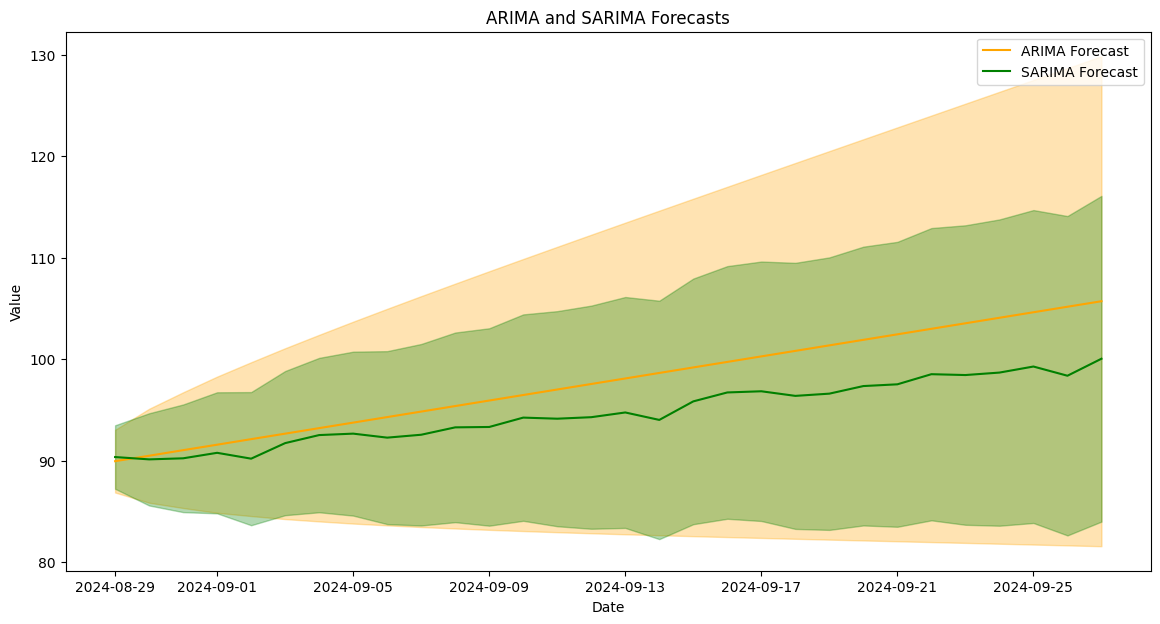

In [ ]:
plt.figure(figsize=(14, 7))

# Plot ARIMA forecast
plt.plot(future_dates, arima_forecast_mean, label='ARIMA Forecast', color='orange')
plt.fill_between(future_dates, arima_conf_int.iloc[:, 0], arima_conf_int.iloc[:, 1], color='orange', alpha=0.3)

# Plot SARIMA forecast
plt.plot(future_dates, sarima_forecast_mean, label='SARIMA Forecast', color='green')
plt.fill_between(future_dates, sarima_conf_int.iloc[:, 0], sarima_conf_int.iloc[:, 1], color='green', alpha=0.3)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA and SARIMA Forecasts')
plt.legend()
plt.show()


# Next 90 Days Forecasting

In [ ]:
# Define the future dates for 90 days after the test period
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=90, freq='D')

In [ ]:
# Forecast with ARIMA
arima_forecast = arima_fit.get_forecast(steps=90)
arima_forecast_mean = arima_forecast.predicted_mean
arima_conf_int = arima_forecast.conf_int()

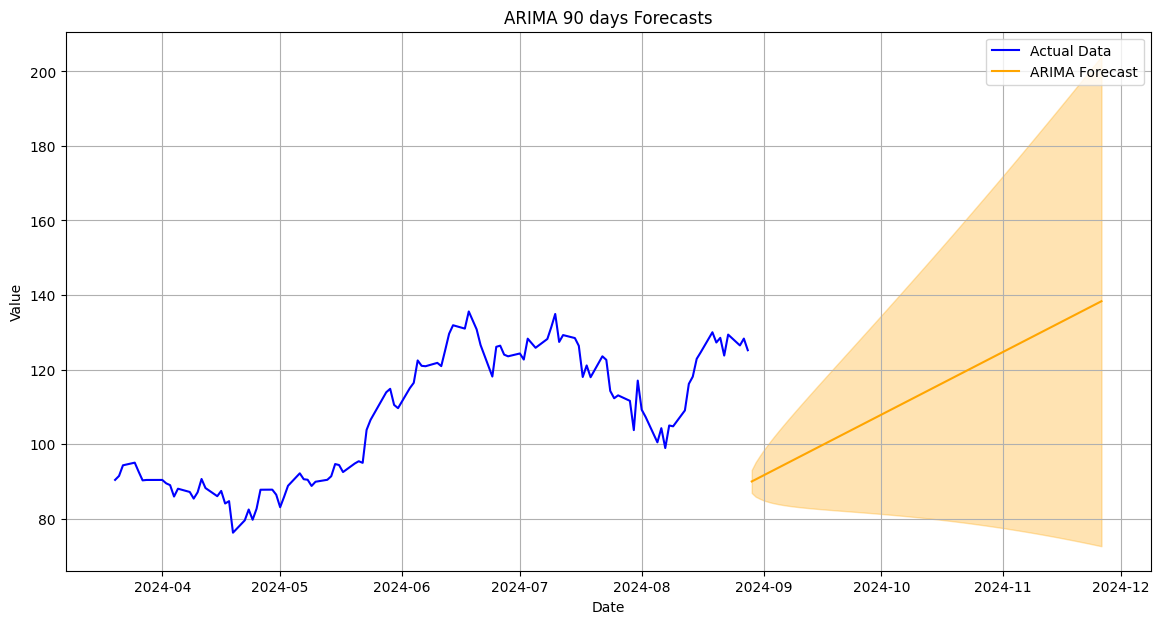

In [ ]:
plt.figure(figsize=(14, 7))

# Plot Actual data
plt.plot(test, label='Actual Data', color='blue')

# Plot ARIMA forecast
plt.plot(future_dates, arima_forecast_mean, label='ARIMA Forecast', color='orange')
plt.fill_between(future_dates, arima_conf_int.iloc[:, 0], arima_conf_int.iloc[:, 1], color='orange', alpha=0.3)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA 90 days Forecasts')
plt.grid(True)

plt.legend()
plt.show()


In [ ]:
# Forecast with SARIMA
sarima_forecast = sarima_fit.get_forecast(steps=90)
sarima_forecast_mean = sarima_forecast.predicted_mean
sarima_conf_int = sarima_forecast.conf_int()

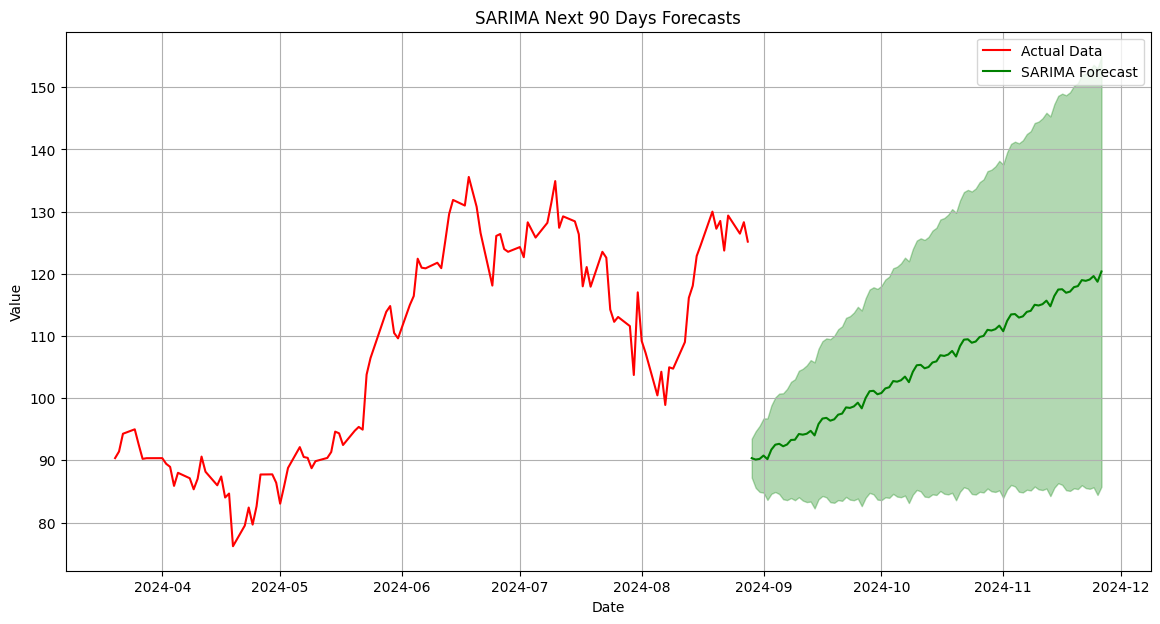

In [ ]:
plt.figure(figsize=(14, 7))

# Plot Actual data
plt.plot(test, label='Actual Data', color='red')

# Plot SARIMA forecast
plt.plot(future_dates, sarima_forecast_mean, label='SARIMA Forecast', color='green')
plt.fill_between(future_dates, sarima_conf_int.iloc[:, 0], sarima_conf_int.iloc[:, 1], color='green', alpha=0.3)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMA Next 90 Days Forecasts')
plt.grid(True)
plt.legend()
plt.show()


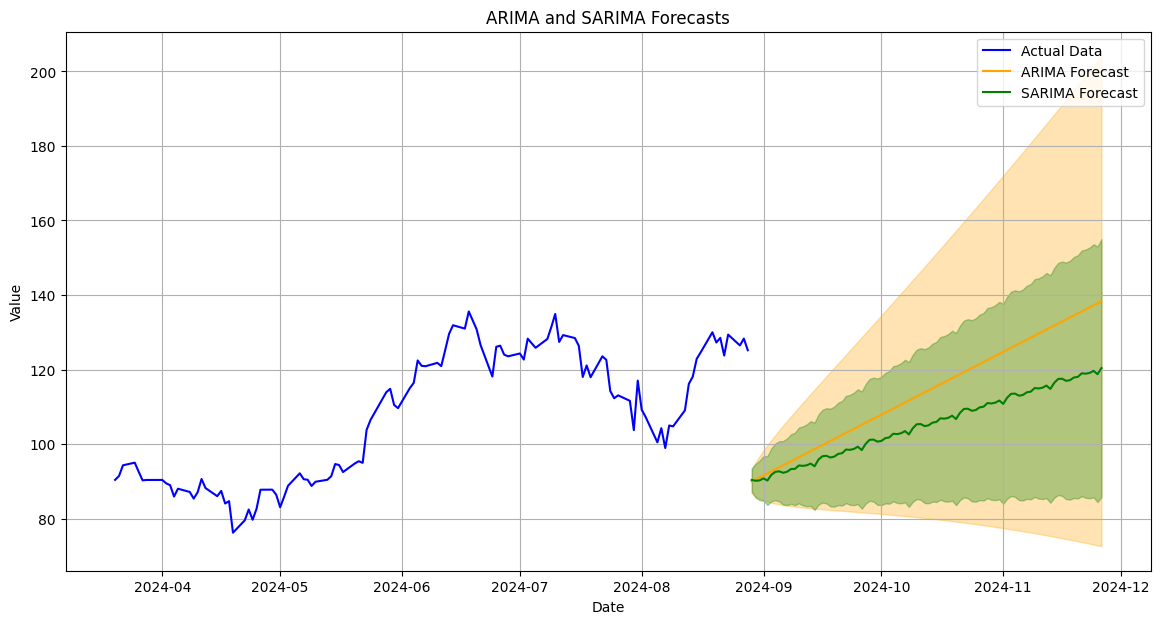

In [ ]:
plt.figure(figsize=(14, 7))

# Plot Actual data
plt.plot(test, label='Actual Data', color='blue')

# Plot ARIMA forecast
plt.plot(future_dates, arima_forecast_mean, label='ARIMA Forecast', color='orange')
plt.fill_between(future_dates, arima_conf_int.iloc[:, 0], arima_conf_int.iloc[:, 1], color='orange', alpha=0.3)

# Plot SARIMA forecast
plt.plot(future_dates, sarima_forecast_mean, label='SARIMA Forecast', color='green')
plt.fill_between(future_dates, sarima_conf_int.iloc[:, 0], sarima_conf_int.iloc[:, 1], color='green', alpha=0.3)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA and SARIMA Forecasts')
plt.grid(True)
plt.legend()
plt.show()
